# Ferromagnetic Hysterisis

## Introduction

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [41]:
data_folder = Path("data")

## Read data

In [64]:
muestras = []
for file in data_folder.iterdir():
		if file.suffix == ".txt":
			muestras.append(pd.read_csv(file, sep="\t", header=1, names=["Current", "Flux"], decimal=","))

In [118]:
# Process samples
def extract_sample(samples, i, n=3):
	sample = pd.concat(samples[n*i:n*(i+1)], axis=1)
	sample["Avg Current"] = sample["Current"].mean(axis=1)
	sample["Std Current"] = sample["Current"].std(axis=1)
	sample["Avg Flux"] = sample["Flux"].mean(axis=1)
	sample["Std Flux"] = sample["Flux"].std(axis=1)

	return sample

In [70]:
sample1 = extract_sample(muestras, 0)
sample2 = extract_sample(muestras, 1)
sample3 = extract_sample(muestras, 2)

In [136]:
def plot_sample(x, y, x_err, y_err, line_params, points_params, figsize=(10, 6), title="Sample", x_label="Current [A]", y_label="Flux [Vs]", save=False, save_name="Figures/Sample"):

	fig, ax = plt.subplots(figsize=figsize)

	plt.errorbar(x, y, xerr=x_err, yerr=y_err, **points_params)
	plt.plot(x, y, **line_params)
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	if points_params["label"] is not None:
		plt.legend()
	plt.title(title)
	plt.show()

	if save:
		plt.savefig(save_name + ".png")

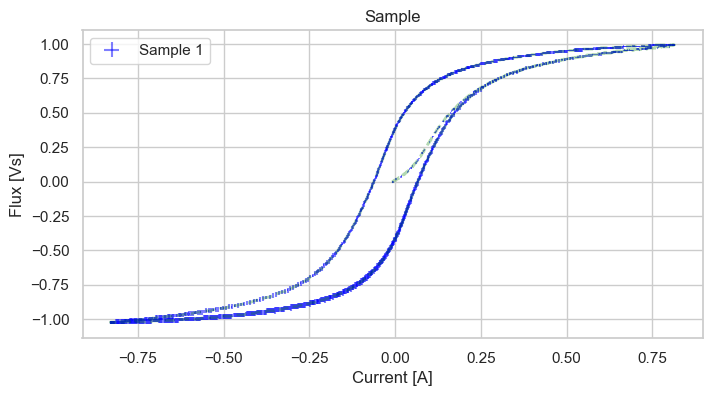

In [139]:
line_params = {
	"color":"green", 
	"linestyle":"--",
	"linewidth":2, 
	"alpha":0.3,
	}

point_params = {
	"color":"blue", 
	"fmt":"None",
	"markersize":6, 
	"alpha":0.5,
	"label":"Sample 1",
}
sample = sample1
x = sample["Avg Current"]
x_err = sample["Std Current"]
y = sample["Avg Flux"]
y_err = sample["Std Flux"]

plot_sample(x, y, x_err, y_err, line_params, point_params, save=False, figsize=(8, 4))